# Installations and Imports

In [4]:
!apt-get update -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

import findspark
findspark.init()

In [7]:
import pyspark

In [9]:
from pyspark.sql import SparkSession

In [11]:
spark= SparkSession.builder.appName('Spark-Udacity practice').getOrCreate()

In [12]:
spark

# Reading json and csv files

In [13]:
user_logs=spark.read.json('sparkify_log_small.json')

In [14]:
user_logs.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [15]:
user_logs.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

In [19]:
user_logs.show(3)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [20]:
user_logs.take(3)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

Converting json to csv

In [25]:
pwd

'/content'

In [27]:
output_path='/content/sparkify_log_small.csv'
user_logs.write.save(output_path,format="csv", header=True)

In [28]:
user_logs_from_csv=spark.read.csv('sparkify_log_small.csv',header=True)

In [29]:
user_logs_from_csv.show(3)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [32]:
user_logs_from_csv.select('artist').show(3)

+--------------------+
|              artist|
+--------------------+
|       Showaddywaddy|
|          Lily Allen|
|Cobra Starship Fe...|
+--------------------+
only showing top 3 rows



# Data Wrangling

Declarative and imperative programming

Imperative - using **spark dataframes**

Declarative -  using **spark sql**

https://spark.apache.org/docs/latest/sql-programming-guide.html

In [33]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
user_logs.show(3)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [40]:
user_logs.select('page').dropDuplicates().sort('page').show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [43]:
user_logs.columns

['artist',
 'auth',
 'firstName',
 'gender',
 'itemInSession',
 'lastName',
 'length',
 'level',
 'location',
 'method',
 'page',
 'registration',
 'sessionId',
 'song',
 'status',
 'ts',
 'userAgent',
 'userId']

In [45]:
user_logs.select(['firstName','location','sessionId','userId','song']).show(5)

+---------+--------------------+---------+------+--------------------+
|firstName|            location|sessionId|userId|                song|
+---------+--------------------+---------+------+--------------------+
|  Kenneth|Charlotte-Concord...|     5132|  1046|Christmas Tears W...|
|Elizabeth|Shreveport-Bossie...|     5027|  1000|       Cheryl Tweedy|
|     Vera|          Racine, WI|     5516|  2219|Good Girls Go Bad...|
|   Sophee|San Luis Obispo-P...|     2372|  2373| Don't See The Point|
|   Jordyn|        Syracuse, NY|     1746|  1747|                null|
+---------+--------------------+---------+------+--------------------+
only showing top 5 rows



In [49]:
user_logs.select(['sessionId','song']).where(user_logs.userId==1046).show(5)

+---------+--------------------+
|sessionId|                song|
+---------+--------------------+
|     5132|Christmas Tears W...|
|     5132|  Be Wary Of A Woman|
|     5132|   Public Enemy No.1|
|     5132|Reign Of The Tyrants|
|     5132|      Father And Son|
+---------+--------------------+
only showing top 5 rows



## Calculating Statistics by Hour

Number of songs listened by user 1046 in an hour

Based on column ts given

In [50]:
from pyspark.sql.functions import udf

In [164]:
get_hour= udf(lambda x: datetime.datetime.fromtimestamp(x/1000).hour)

In [52]:
user_logs=user_logs.withColumn('hour',get_hour(user_logs.ts))

In [53]:
user_logs.show(1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+----------

In [56]:
songs_in_hour = user_logs.filter(user_logs.page == "NextSong").groupby(user_logs.hour).count().orderBy(user_logs.hour.cast("float"))

In [57]:
songs_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
|   5|  276|
|   6|  348|
|   7|  358|
|   8|  375|
|   9|  249|
|  10|  216|
|  11|  228|
|  12|  251|
|  13|  339|
|  14|  462|
|  15|  479|
|  16|  484|
|  17|  430|
|  18|  362|
|  19|  295|
+----+-----+
only showing top 20 rows



In [58]:
songs_in_hour_pd=songs_in_hour.toPandas()

In [63]:
songs_in_hour_pd.head(2)

,hour,count
0,0,456
1,1,454


In [68]:
type(songs_in_hour_pd['hour'][0])

str

In [69]:
songs_in_hour_pd.hour = pd.to_numeric(songs_in_hour_pd.hour)

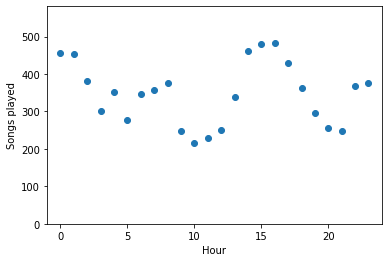

In [74]:
plt.scatter(songs_in_hour_pd['hour'],songs_in_hour_pd['count'])
plt.xlim(-1, 24);
plt.ylim(0, 1.2 * max(songs_in_hour_pd["count"]))
plt.xlabel("Hour")
plt.ylabel("Songs played");

## Drop Rows with Missing Values

In [80]:
user_log_valid = user_logs.dropna(how = "any", subset = ["userId", "sessionId"])

In [77]:
user_log_valid.count()

10000

In [82]:
user_logs.select("userId").dropDuplicates().sort("userId").show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+
only showing top 20 rows



In [83]:
user_log_valid = user_log_valid.filter(user_log_valid["userId"] != "")

In [84]:
user_log_valid.count()

9664

## Users Downgrade Their Accounts

In [88]:
user_log_valid.filter("page = 'Submit Downgrade'").show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  null|Logged In|    Kelly|     F|           24|  Newton|  null| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|null|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  11|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [91]:
user_log_valid.select(["userId", "firstname", "page", "level", "song"]).where(user_log_valid.userId == "1138").collect()

[Row(userId='1138', firstname='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstname='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [93]:
from pyspark.sql.types import IntegerType
flag_downgrade_event = udf(lambda x: 1 if x == "Submit Downgrade" else 0, IntegerType())

In [94]:
user_log_valid = user_log_valid.withColumn("downgraded", flag_downgrade_event("page"))

In [95]:
type(user_log_valid)

pyspark.sql.dataframe.DataFrame

In [97]:
user_log_valid.head(3)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour='22', downgraded=0),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000', hour='22', downgraded=0),
 Row(artist='Cobra Starship Feat

In [100]:
from pyspark.sql import Window
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

In [106]:
windowval = Window.partitionBy("userId").orderBy("ts").rangeBetween(Window.unboundedPreceding, 0)

In [107]:
user_log_valid = user_log_valid.withColumn("phase", Fsum("downgraded").over(windowval))

In [ ]:
user_log_valid.select(["userId", "firstname", "ts", "page", "level","downgraded", "phase"]).where(user_log_valid.userId == "1138").sort("ts").collect()

# Quiz

In [122]:
user_logs.select('page').dropDuplicates().count()

13

In [126]:
user_logs.select(['page']).where(user_logs.userId=="").dropDuplicates().collect()

[Row(page='Home'), Row(page='About'), Row(page='Login'), Row(page='Help')]

In [134]:
user_logs.select(['gender']).show(2)

+------+
|gender|
+------+
|     M|
|     F|
+------+
only showing top 2 rows



In [135]:
user_logs.show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shrevep

In [139]:
unique_users=user_logs.select("userId",'gender').dropDuplicates()

In [140]:
unique_users.select('gender').where(unique_users.gender=='F').count()
#df.filter(df.gender == 'F').select('userId', 'gender').dropDuplicates().count()

462

In [152]:
user_logs.select('page').dropDuplicates().show()

+----------------+
|            page|
+----------------+
|Submit Downgrade|
|            Home|
|       Downgrade|
|          Logout|
|   Save Settings|
|           About|
|        Settings|
|           Login|
|        NextSong|
|            Help|
|         Upgrade|
|           Error|
|  Submit Upgrade|
+----------------+



In [147]:
user_logs.filter(user_logs.page == 'NextSong') \
    .select('Artist') \
    .groupBy('Artist') \
    .agg({'Artist':'count'}) \
    .withColumnRenamed('count(Artist)', 'Artistcount') \
    .sort(desc('Artistcount')) \
    .show(3)

#ans 83

+--------------------+-----------+
|              Artist|Artistcount|
+--------------------+-----------+
|            Coldplay|         83|
|       Kings Of Leon|         69|
|Florence + The Ma...|         52|
+--------------------+-----------+
only showing top 3 rows



In [ ]:
#From Udacity solution:
function = udf(lambda ishome : int(ishome == 'Home'), IntegerType())

user_window = Window \
    .partitionBy('userID') \
    .orderBy(desc('ts')) \
    .rangeBetween(Window.unboundedPreceding, 0)

cusum = df.filter((df.page == 'NextSong') | (df.page == 'Home')) \
    .select('userID', 'page', 'ts') \
    .withColumn('homevisit', function(col('page'))) \
    .withColumn('period', Fsum('homevisit').over(user_window))

cusum.filter((cusum.page == 'NextSong')) \
    .groupBy('userID', 'period') \
    .agg({'period':'count'}) \
    .agg({'count(period)':'avg'}).show()


# Spark SQL

In [153]:
user_logs.createOrReplaceTempView("user_log_table")

In [155]:
spark.sql("Select * FROM user_log_table LIMIT 2").show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541

In [161]:
spark.sql("select artist,page from user_log_table where userId==1046 limit 5").show()

+-------------+--------+
|       artist|    page|
+-------------+--------+
|Showaddywaddy|NextSong|
|Darius Rucker|NextSong|
| Public Enemy|NextSong|
|   Jag Panzer|NextSong|
|      Boyzone|NextSong|
+-------------+--------+



In [162]:
spark.sql("select distinct page from user_log_table order by page asc").show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



In [170]:
#Register the function before using it

spark.udf.register("get_hour", lambda x: int(datetime.datetime.fromtimestamp(x / 1000.0).hour))

<function __main__.<lambda>>

In [167]:
spark.sql("select page, get_hour(ts) as hour from user_log_table limit 3").show()

+--------+----+
|    page|hour|
+--------+----+
|NextSong|  22|
|NextSong|  22|
|NextSong|  22|
+--------+----+



In [ ]:
#From Udacity course
songs_in_hour = spark.sql('''
          SELECT get_hour(ts) AS hour, COUNT(*) as plays_per_hour
          FROM user_log_table
          WHERE page = "NextSong"
          GROUP BY hour
          ORDER BY cast(hour as int) ASC
          ''')

# Quiz 2

In [ ]:
#From Udacity solutions
# SELECT distinct pages for the blank user and distinc pages for all users
# Right join the results to find pages that blank visitor did not visit
spark.sql("SELECT * \
            FROM ( \
                SELECT DISTINCT page \
                FROM log_table \
                WHERE userID='') AS user_pages \
            RIGHT JOIN ( \
                SELECT DISTINCT page \
                FROM log_table) AS all_pages \
            ON user_pages.page = all_pages.page \
            WHERE user_pages.page IS NULL").show()

In [174]:
spark.sql("select count(distinct userId) from user_log_table where gender=='F'").show()

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                   462|
+----------------------+



In [175]:
#From udacity
spark.sql("SELECT Artist, COUNT(Artist) AS plays \
        FROM user_log_table \
        GROUP BY Artist \
        ORDER BY plays DESC \
        LIMIT 1").show()

+--------+-----+
|  Artist|plays|
+--------+-----+
|Coldplay|   83|
+--------+-----+



# Notes

The queries I write using high level APIs either using sql or dataframes, they both go to a query optimizer called as 'catalyst'. 

Three sets of APIs—RDDs, DataFrames, and Datasets—available in Apache Spark 2.2 and beyond.